DOGS IN THE CITY

Project Title: Dogs in the City

Team members:
Emily Kwan
Hetsvi Navnitlal


## Questions Addressed


We would like to explore the different breeds of dogs in New York City. One question we would like to answer is which breeds of dogs are the most popular in each zip code of New York City and compare the breed with the median income of that zip code. Another question we would like to answer is whether the most popular breed of dog in a certain zip code is in any way correlated with the amount of crime in that zip code. Would areas with more crime have more of a certain breed of dog or larger dogs in general? We expect to find that areas of NYC with higher incomes would have more expensive breeds of dogs and also that areas of higher crime will have larger dogs. The business case for these questions are so businesses such as animal shelters and dog breeders will know how they should select dogs to either display or breed in their shelters depending on which area of the city they are located. Say we found that corgis were the most popular dog breed in zip code 12345, then animal shelters in that area would know to try to trade around for as many corgis to have in their shelter. Shelters in other zip codes with corgis would send over their corgis to the original shelter in exchange for their most popular breed of dog. That way, dogs everywhere would have their highest chance of getting adopted. 



In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
import shapely.wkt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import Image

## Background and Literature
Source 1: https://www.nytimes.com/2018/02/09/learning/what-do-the-dogs-in-your-neighborhood-say-about-where-you-live.html


The first source is an article about the dogs in the New York City area. This is where we learned that gentrification is one of the factors that is correlated to the types of dogs living in a certain neighborhood. This article inspired us to research the potential connection between dogs and the areas they live in. It’s connection to gentrification made it one of the potential business cases for the project. 

Source 2: https://www.nycedc.com/blog-entry/new-york-citys-dog-population


The second source talks about the registration of dog licenses in New York City. It provided insight into the amount of dogs registered each year as well as the areas where owners are most likely to register their dogs. This article helped us understand why there might be potential bias present in the finding we discover. 
Source 3: https://maps.nyc.gov/crime/


The third source provided a great visualization of crimes that occur in New York City. It allowed us to draw relationships between zip codes and types or amounts of crimes that occur in each zip code. It helps us see crime in the city in a much more detailed manner than with the data set we had found but had no context. 


Source 4: https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Household-Income

The fourth source provided statistics regarding income in New York. It provided different breakdowns by zip codes as well as showed more details about income. As one of our research questions was finding the correlation between income and dogs, the statistics and facts found in this source help connect that. 


All the sources mentioned were very helpful in gaining insights into this project. It helped connect ideas and provided context on New York City that we did not know about. It also inspired some of the original research questions we had such as the one looking for the effect of dogs on gentrification in a city. It was also helpful in generating business cases for our project. 



In [2]:
dog_data = pd.read_csv('NYC_Dog_Licensing_Dataset.csv')


## Libraries and Modules

The python libraries and modules we used are:
Geopandas - to clean and manipulate the data as geodata frames before plotting
Spatial data frame - hold spatial data such as zip code boundaries
Map and Point layers - to layer the most popular dog breed according to location on the map
scikit-learn - implement machine learning models.
Matplotlib - plot scatterplots and choropleth maps

Our original plan was to incorporate content manager in order to geoenrich our dataset but we were able to find sufficient information from other sources such as NYC crime and income for the purpose of the questions we were trying to answer in this project. We also utilized the Python scikit-learn library in order to implement our logistic regression classification model. However, we found the the features we had were not great predictors of dog breeds, likely due to the weak correlation between our features and dog breeds. In this regard, geoenriching would have been helpful in providing us with more features to train our model on. 



## Data Sources:

Source 1: NYC Dog Licenses Dataset http://datadiscoverystudio.org/geoportal/rest/metadata/item/ed7bd40415784ced952fa31c56502386/html
Dataset of licensed dogs in New York City with breed, name, zip code, and census tract.

Source 2: Income Statistics by Zip Code
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi
IRS income statistics such as tax returns and incomes by zip codes

Source 3: Median/ Mean income by zip code:
https://www.psc.isr.umich.edu/dis/census/Features/tract2zip/
Dataset of the mean and median incomes by zip codes across America.

Source 4: New York City Crime Statistics
https://data.cityofnewyork.us/Public-Safety/Crime-Map-/5jvd-shfj
Dataset of all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD)

Source 5: Boundaries of Zip Codes
https://catalog.data.gov/dataset/tiger-line-shapefile-2017-2010-nation-u-s-2010-census-5-digit-zip-code-tabulation-area-zcta5-na
Shapefile of geometric boundaries of zip codes according to 2010 census data.

Source 6: Median incomes and population by Zip Code
https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml?src=bkmk
Dataset of median incomes and population statistics by zip codes in America

In our initial proposal phase we found a source for tax returns from the IRS but it was only after some more analysis we realized that it did not have the information we needed and only had ranges of incomes and number of tax returns per zip code. Trying to find income data turned out to be quite the struggle because either the data was too old, such as from 2010 or it could only be found from websites that required a fee to access them. Luckily we were able to find information from the American Community Survey that occurs every year. Since it was just a survey, there may have been reporting bias that could have skewed the results but it provided the median income estimate that we needed for our project. 

We also had difficulty finding any dataset that had average cost of purchasing a certain breed of dog as well as datasets that had average weight of breeds of dogs. We ended up having to generate our own datasets of each breed’s weight and price through a long period of manual googling. A potential worry regarding the quality of our dataset was that the dogs dataset had quite a few dogs which were registered as breeds unknown as well as one source we found saying that not many New Yorkers actually register their dog licenses every year. Finding a dataset that resolves these two problems could have given us a more accurate picture of the dogs in New York and potentially change the quality of our classification model.



## Data Cleaning

For our data cleaning process, we decided to focus only on the dog licenses that were registered in 2016 as that was the year that had the most registrations and therefore dogs in our dataset. We then decided to drop all the unknown breeds of dogs so as to not skew the results. Since our focus was on the year 2016, we had to select from the NYC crime and income datasets only those that represented 2016. We determined the range of zip codes that were New York City and selected those zip codes from the zip shapefile of all US zip codes. Finally since the crime dataset did not contain a zip code column but only lat/long of where each crime happened, we had to join that with the zip codes dataset.



In [3]:
crime_data = gpd.read_file('2016.csv')




In [4]:
crime_data.head()


CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM ADDR_PCT_CD  \
0  480878349   03/02/2015     12:00:00   03/02/2016     12:15:00          75   
1  862381535   11/17/2016     13:00:00   12/17/2016     13:30:00          73   
2  989056788   11/17/2016     12:00:00   11/25/2016     12:00:00         111   
3  145284773   01/10/2015     19:00:00   01/11/2016     05:45:00         107   
4  783583292   01/01/2015     11:00:00   01/02/2016     11:40:00          24   

       RPT_DT KY_CD                       OFNS_DESC PD_CD  ...  \
0  03/04/2015   344    ASSAULT 3 & RELATED OFFENSES   101  ...   
1  12/19/2016   112                     THEFT-FRAUD   739  ...   
2  12/19/2016   109                   GRAND LARCENY   422  ...   
3  01/11/2015   109                   GRAND LARCENY   457  ...   
4  01/02/2015   351  CRIMINAL MISCHIEF & RELATED OF   259  ...   

  TRANSIT_DISTRICT      Latitude      Longitude  \
0                   40.689307919   -73.87405542   
1                   40.671649253  -73.914153872   
2                   40.737499063  -73.754140785   
3                   40.733264952  -73.779039009   
4                   40.802394018  -73.962472767   

                         Lat_Lon               PATROL_BORO STATION_NAME  \
0   (40.689307919, -73.87405542)   PATROL BORO BKLYN NORTH                
1  (40.671649253, -73.914153872)   PATROL BORO BKLYN NORTH                
2  (40.737499063, -73.754140785)  PATROL BORO QUEENS NORTH                
3  (40.733264952, -73.779039009)  PATROL BORO QUEENS SOUTH                
4  (40.802394018, -73.962472767)     PATROL BORO MAN NORTH                

  VIC_AGE_GROUP                  VIC_RACE VIC_SEX geometry  
0         45-64            WHITE HISPANIC       M     None  
1         25-44                     BLACK       M     None  
2         45-64  ASIAN / PACIFIC ISLANDER       M     None  
3         45-64                     WHITE       M     None  
4           <18            WHITE HISPANIC       F     None  

[5 rows x 36 columns]

In [5]:
zip_data = gpd.read_file('tl_2017_us_zcta510.shp')


In [6]:
income_data = gpd.read_file('ACS_16_5YR_S1903_with_ann.csv')
income_data = income_data[1:]

In [7]:
dog_wt_data = pd.read_csv('all_weights.csv')
dog_price_data = pd.read_csv('prices.csv', header = None)
zip_pop_data = pd.read_csv('zip_pop.csv')
zip_pop_data = zip_pop_data[1:]

In [8]:
dog_price_data.head()
dog_price = dog_price_data
dog_price.columns = ['pic_file', 'price']
dog_price.head()

pic_file  price
0  yorkshire_terrier    600
1          chihuahua    650
2   bull_dog_english   1250
3     french_bulldog   2000
4   golden_retriever   1000

In [9]:
zip_pop = zip_pop_data[['GEO.id2', 'HD01_VD01']]
zip_pop.columns = ['ZipCode', 'pop']
zip_pop = zip_pop[((zip_pop['ZipCode']).astype(int) > 10000) & ((zip_pop['ZipCode']).astype(int) < 11698)]
zip_pop.head()

ZipCode    pop
3   10001  23947
4   10002  77925
5   10003  55035
6   10004   2990
7   10005   8680

In [10]:
borough = dog_data[['Borough', 'ZipCode']]
borough = borough.drop_duplicates(subset=['ZipCode'], keep='first', inplace=False)
borough.head()

Borough  ZipCode
0  Queens  11435.0
1  Queens  11691.0
2  Queens  11419.0
3  Queens  11692.0
6  Queens  11694.0

In [11]:
dog_wt = dog_wt_data
dog_wt = dog_wt.fillna(0)
dog_wt = dog_wt.replace('na', np.nan)
dog_wt = dog_wt.replace('not found', np.nan)
dog_wt = dog_wt.dropna()

dog_wt['weight'] = (dog_wt['weight_low_lbs'].astype(int) + dog_wt['weight_high_lbs'].astype(int))/2
dog_wt['weight'] = (dog_wt['new_weight'].astype(int) + dog_wt['weight'].astype(int))
dog_wt = dog_wt[['Breed', 'weight']]
dog_wt.head()

Breed  weight
0                 Akita     100
1    Anatolian Sheepdog     125
2  Bernese Mountain Dog      97
3            Bloodhound     100
4                Borzoi      85

In [12]:
dogs = dog_data.dropna(subset = ['LicenseIssuedDate'])
mask = dogs.LicenseIssuedDate.str.contains('2016')
dogs = dogs.loc[mask]
zips = zip_data[((zip_data['GEOID10']).astype(int) > 10000) & ((zip_data['GEOID10']).astype(int) < 11698)]
zips = zips[['GEOID10', 'geometry']]
zips = zips.dropna(subset = ['geometry'])
crime_data['Latitude'] = crime_data['Latitude'].replace('', np.nan)
crime_data['Longitude'] = crime_data['Longitude'].replace('', np.nan)
crime = crime_data.dropna(subset = ['Latitude', 'Longitude'])
geometry = [Point(y, x) for x, y in zip(crime['Latitude'].astype(float), crime['Longitude'].astype(float))]

income = income_data[['GEO.id2', 'HC02_EST_VC02']]
income = income.drop(income.index[[0]])
income = income[((income['GEO.id2']).astype(int) > 10000) & ((income['GEO.id2']).astype(int) < 11698)]
income = income[income.HC02_EST_VC02 != '-']

In [13]:
dog_weights = dogs[['BreedName', 'ZipCode']]
dog_weights = pd.merge(dog_weights, dog_wt, how = 'left', left_on='BreedName', right_on = 'Breed')
dog_weights = dog_weights.drop('Breed', axis = 1)
dog_weights.head()

BreedName  ZipCode  weight
0  American Pit Bull Terrier/Pit Bull  11420.0      62
1                   Poodle Crossbreed  11434.0      30
2                   Yorkshire Terrier  11692.0       5
3        Yorkshire Terrier Crossbreed  11691.0       8
4                Schnauzer, Miniature  11413.0      18

In [14]:
crime = crime.set_geometry(geometry)
zips = zips.set_geometry('geometry')
crime.crs = {'init': 'epsg:4326'}
zips = zips.to_crs(epsg=4326)

In [15]:
crimes = gpd.sjoin(crime, zips, how = 'left', op = 'within')
crimes = crimes.dropna(subset = ['GEOID10'])
crimes = crimes[['GEOID10', 'LAW_CAT_CD', 'geometry']]
crimes.columns = ['zip', 'crime_level', 'geometry']
crimes = crimes[crimes['crime_level']!='VIOLATION']
crimes.head()


/opt/conda/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


zip  crime_level                                 geometry
0  11208  MISDEMEANOR        POINT (-73.87405542 40.689307919)
1  11233       FELONY       POINT (-73.914153872 40.671649253)
2  11364       FELONY       POINT (-73.754140785 40.737499063)
3  11366       FELONY       POINT (-73.779039009 40.733264952)
4  10025  MISDEMEANOR  POINT (-73.96247276699999 40.802394018)

## Analysis

In order to start our analysis to answer the proposed questions, we first grouped the cleaned crime dataset by the zip codes we just spatially joined it with and summed up the number of felonies, misdemeanors, and total crimes that occurred in each zip code. Then we merged this dataset with dog weights, income, population, and dog licenses dataset. Then we calculated new columns of crimes, felonies, and misdemeanor per capita in order to compare the amount of crime relative to the population per zip code. Then we grouped this new dataset by zip codes in order to create a dataset with most popular dog breeds by zip code. Then we added an image file name column to the dataset in order to visualize the dog distribution by zip code in Suave. 
We also created scatterplots in order to visualize the relationships between crimes and dog weights, felonies and dog weights, as well as median incomes and dog prices. We attempted to fit linear regression to these relationships but found that there wasn’t much of one that could be found. Finally we ran a logistic regression and classification to predict dog breeds based on income, dog breeds based on crime features, and dog breeds based on both crime and income features. 

Our plan of analysis differed slightly from the one we originally had in our project proposal. We did not anticipate the amount of data cleaning that was necessary in order to combine all the different datasets. Our original plan was also to plot each zip code area onto a map and somehow place an image of that zip code’s most popular dog onto it. However, after speaking to the professor regarding this idea, he recommended we use the Suave program instead since it was much more receptive to this grouping and displaying images idea we had. Using Suave allowed us to easily visualize images of the actual dog breeds that were most popular in the area as well as provided a way for us to manipulate and compare different relationships between variables in an easily understandable fashion. 



In [16]:
grouped = crimes.groupby('zip')['crime_level'].value_counts()
grouped = pd.DataFrame(grouped)
grouped.columns = ['num_crimes']
grouped = grouped.reset_index()
zip_crimes = pd.pivot_table(grouped, index = ['zip'], values = 'num_crimes', columns = ['crime_level'])
zip_crimes = zip_crimes.reset_index()
zip_crimes['num_crimes'] = zip_crimes['FELONY'] + zip_crimes['MISDEMEANOR']
zip_crimes.head()

crime_level    zip  FELONY  MISDEMEANOR  num_crimes
0            10001  1509.0       2182.0      3691.0
1            10002  1339.0       2859.0      4198.0
2            10003  1379.0       2290.0      3669.0
3            10004   162.0        360.0       522.0
4            10005   128.0        189.0       317.0

In [17]:
zip_crimes['zip'] = zip_crimes['zip'].astype(float)
zip_pop['ZipCode'] = zip_pop['ZipCode'].astype(float)

dog_weights_crimes = pd.merge(dog_weights, zip_crimes, how = 'left', left_on='ZipCode', right_on = 'zip')
dog_weights_crimes["FELONY"] = dog_weights_crimes["FELONY"].astype(float)
dog_weights_crimes['MISDEMEANOR'] = dog_weights_crimes["MISDEMEANOR"].astype(float)
dog_weights_crimes = pd.merge(dog_weights_crimes, zip_pop, how = 'left', left_on='ZipCode', right_on = 'ZipCode')
dog_weights_crimes["pop"] = dog_weights_crimes["pop"].astype(float)

dog_weights_crimes['pct_crime'] = dog_weights_crimes["num_crimes"]/dog_weights_crimes["pop"]
dog_weights_crimes['pct_fel'] = dog_weights_crimes["FELONY"]/dog_weights_crimes["pop"]
dog_weights_crimes['pct_mis'] = dog_weights_crimes["MISDEMEANOR"]/dog_weights_crimes["pop"]
dog_weights_crimes = dog_weights_crimes.replace([np.inf, -np.inf], np.nan)
dog_weights_crimes = dog_weights_crimes.fillna(0)

dog_weights_crimes = dog_weights_crimes.drop(['zip'], axis = 1)
dog_weights_crimes.head()

BreedName  ZipCode  weight  FELONY  MISDEMEANOR  \
0  American Pit Bull Terrier/Pit Bull  11420.0      62   704.0        898.0   
1                   Poodle Crossbreed  11434.0      30  1242.0       2146.0   
2                   Yorkshire Terrier  11692.0       5   480.0        573.0   
3        Yorkshire Terrier Crossbreed  11691.0       8  1412.0       1811.0   
4                Schnauzer, Miniature  11413.0      18   600.0        663.0   

   num_crimes      pop  pct_crime   pct_fel   pct_mis  
0      1602.0  49396.0   0.032432  0.014252  0.018180  
1      3388.0  66725.0   0.050776  0.018614  0.032162  
2      1053.0  20242.0   0.052021  0.023713  0.028307  
3      3223.0  65356.0   0.049315  0.021605  0.027710  
4      1263.0  42895.0   0.029444  0.013988  0.015456

In [18]:
breeds = dogs[['ZipCode', 'BreedName']]
breeds = breeds[((breeds['ZipCode']).astype(int) > 10000) & ((breeds['ZipCode']).astype(int) < 11698)]
breeds = breeds[breeds.BreedName != 'Unknown']
breeds = breeds.groupby(['ZipCode']).agg(lambda x: x.mode())
breeds = breeds['BreedName'].apply(pd.Series) \
    .merge(breeds, right_index = True, left_index = True) \
    .drop(["BreedName"], axis = 1) \
    .reset_index() \
    .melt(id_vars = ['ZipCode'], value_name = "BreedName") \
    .drop("variable", axis = 1) \
    .dropna()
zips['GEOID10'] = zips['GEOID10'].astype(float)
breeds = pd.merge(breeds, zips, how = 'inner', left_on='ZipCode', right_on = 'GEOID10')
breeds = pd.merge(breeds, dog_wt, how = 'left', left_on='BreedName', right_on = 'Breed')

breeds.head()

ZipCode          BreedName  GEOID10  \
0  10001.0  Yorkshire Terrier  10001.0   
1  10002.0  Yorkshire Terrier  10002.0   
2  10003.0          Chihuahua  10003.0   
3  10004.0  Bull Dog, English  10004.0   
4  10004.0     French Bulldog  10004.0   

                                            geometry              Breed  \
0  POLYGON ((-74.00828145151267 40.75028026366047...  Yorkshire Terrier   
1  POLYGON ((-73.99750544586593 40.71407725694771...  Yorkshire Terrier   
2  POLYGON ((-73.99936744750801 40.73133126026276...          Chihuahua   
3  (POLYGON ((-73.99813844530892 40.7015332544669...  Bull Dog, English   
4  (POLYGON ((-73.99813844530892 40.7015332544669...     French Bulldog   

   weight  
0       5  
1       5  
2       3  
3      47  
4      22

In [19]:
pic_file = breeds['BreedName'].str.lower()
pic_file = pic_file.str.replace(' ', '_')
pic_file = pic_file.str.replace(',', '')
pic_file = pic_file.str.replace('american_pit_bull_mix_/_pit_bull_mix', 'pitbull_mix')
pic_file = pic_file.str.replace('american_pit_bull_terrier/pit_bull', 'pitbull')
pic_file = pic_file.str.replace('collie_border', 'border_collie')
breeds['pic_file'] = pic_file
breeds.head()


ZipCode          BreedName  GEOID10  \
0  10001.0  Yorkshire Terrier  10001.0   
1  10002.0  Yorkshire Terrier  10002.0   
2  10003.0          Chihuahua  10003.0   
3  10004.0  Bull Dog, English  10004.0   
4  10004.0     French Bulldog  10004.0   

                                            geometry              Breed  \
0  POLYGON ((-74.00828145151267 40.75028026366047...  Yorkshire Terrier   
1  POLYGON ((-73.99750544586593 40.71407725694771...  Yorkshire Terrier   
2  POLYGON ((-73.99936744750801 40.73133126026276...          Chihuahua   
3  (POLYGON ((-73.99813844530892 40.7015332544669...  Bull Dog, English   
4  (POLYGON ((-73.99813844530892 40.7015332544669...     French Bulldog   

   weight           pic_file  
0       5  yorkshire_terrier  
1       5  yorkshire_terrier  
2       3          chihuahua  
3      47   bull_dog_english  
4      22     french_bulldog

In [20]:
income['GEO.id2'] = income['GEO.id2'].astype(float)
breeds_income = pd.merge(breeds, income, how = 'inner', left_on='ZipCode', right_on = 'GEO.id2')
breeds_income = breeds_income.drop(['GEO.id2'], axis = 1)
breeds_income = breeds_income.rename(columns = {"HC02_EST_VC02": 'median_income'})
multi = [MultiPolygon([x]) for x in breeds_income['geometry']]
breeds_income['geometry'] = multi
rounded = [shapely.wkt.dumps(x, rounding_precision = 4) for x in breeds_income['geometry']]
breeds_income['geometry'] = rounded

breeds_income.head()

ZipCode          BreedName  GEOID10  \
0  10001.0  Yorkshire Terrier  10001.0   
1  10002.0  Yorkshire Terrier  10002.0   
2  10003.0          Chihuahua  10003.0   
3  10004.0  Bull Dog, English  10004.0   
4  10004.0     French Bulldog  10004.0   

                                            geometry              Breed  \
0  MULTIPOLYGON (((-74.0083 40.7503, -74.0078 40....  Yorkshire Terrier   
1  MULTIPOLYGON (((-73.9975 40.7141, -73.9971 40....  Yorkshire Terrier   
2  MULTIPOLYGON (((-73.9994 40.7313, -73.9991 40....          Chihuahua   
3  MULTIPOLYGON (((-73.9981 40.7015, -73.9962 40....  Bull Dog, English   
4  MULTIPOLYGON (((-73.9981 40.7015, -73.9962 40....     French Bulldog   

   weight           pic_file median_income  
0       5  yorkshire_terrier         85168  
1       5  yorkshire_terrier         35594  
2       3          chihuahua        100791  
3      47   bull_dog_english        123056  
4      22     french_bulldog        123056

In [21]:
zip_crimes['zip'] = zip_crimes['zip'].astype(float)
zip_pop['ZipCode'] = zip_pop['ZipCode'].astype(float)
zip_pop['pop'] = zip_pop['pop'].astype(float)

breeds_income_crime = pd.merge(breeds_income, zip_crimes, how = 'inner', left_on='ZipCode', right_on = 'zip')

breeds_income_crime = pd.merge(breeds_income_crime, dog_price, how = 'left', left_on='pic_file', right_on = 'pic_file')
breeds_income_crime = pd.merge(breeds_income_crime, zip_pop, how = 'left', left_on='ZipCode', right_on = 'ZipCode')
breeds_income_crime = pd.merge(breeds_income_crime, borough, how = 'left', left_on='ZipCode', right_on = 'ZipCode')

breeds_income_crime = breeds_income_crime.drop(['zip', 'GEOID10', 'Breed'], axis = 1)
breeds_income_crime['#name'] = breeds_income_crime['ZipCode']
breeds_income_crime = breeds_income_crime.reset_index()
breeds_income_crime.columns = ["Index#number#hidden", "ZipCode", "BreedName", "geometry", 'weight#number', "#img", "income#number", \
"FELONY#number", "MISDEMEANOR#number", "num_crimes#number", 'price#number', 'pop#number', "borough", "#name"]
breeds_income_crime['pct_crime#number'] = breeds_income_crime["num_crimes#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_fel#number'] = breeds_income_crime["FELONY#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_mis#number'] = breeds_income_crime["MISDEMEANOR#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_crime#number'] = breeds_income_crime['pct_crime#number'].fillna(0)
breeds_income_crime['income#number'] = breeds_income_crime['income#number'].replace('+', '')
breeds_income_crime = breeds_income_crime[["Index#number#hidden", "ZipCode", "BreedName", 'weight#number', "#img", "income#number", \
"FELONY#number", "MISDEMEANOR#number", "num_crimes#number", 'price#number', 'pop#number', "pct_crime#number", "pct_fel#number", "pct_mis#number", "#name", 'borough', 'geometry']]
breeds_income_crime.head()

#breeds_income_crime.to_csv('breeds_income_crime.csv')

Index#number#hidden  ZipCode          BreedName  weight#number  \
0                    0  10001.0  Yorkshire Terrier              5   
1                    1  10002.0  Yorkshire Terrier              5   
2                    2  10003.0          Chihuahua              3   
3                    3  10004.0  Bull Dog, English             47   
4                    4  10004.0     French Bulldog             22   

                #img income#number  FELONY#number  MISDEMEANOR#number  \
0  yorkshire_terrier         85168         1509.0              2182.0   
1  yorkshire_terrier         35594         1339.0              2859.0   
2          chihuahua        100791         1379.0              2290.0   
3   bull_dog_english        123056          162.0               360.0   
4     french_bulldog        123056          162.0               360.0   

   num_crimes#number  price#number  pop#number  pct_crime#number  \
0             3691.0           600     23947.0          0.154132   
1             4198.0           600     77925.0          0.053872   
2             3669.0           650     55035.0          0.066667   
3              522.0          1250      2990.0          0.174582   
4              522.0          2000      2990.0          0.174582   

   pct_fel#number  pct_mis#number    #name    borough  \
0        0.063014        0.091118  10001.0  Manhattan   
1        0.017183        0.036689  10002.0  Manhattan   
2        0.025057        0.041610  10003.0  Manhattan   
3        0.054181        0.120401  10004.0  Manhattan   
4        0.054181        0.120401  10004.0  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((-74.0083 40.7503, -74.0078 40....  
1  MULTIPOLYGON (((-73.9975 40.7141, -73.9971 40....  
2  MULTIPOLYGON (((-73.9994 40.7313, -73.9991 40....  
3  MULTIPOLYGON (((-73.9981 40.7015, -73.9962 40....  
4  MULTIPOLYGON (((-73.9981 40.7015, -73.9962 40....

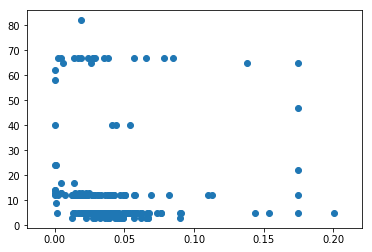

In [22]:
# plotting crimes per capita vs weight of most popular dog.
plt.scatter(breeds_income_crime['pct_crime#number'], breeds_income_crime["weight#number"])

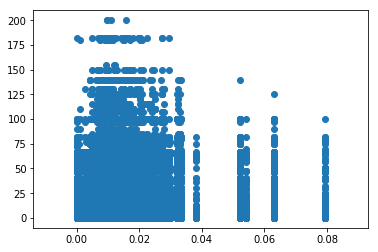

In [23]:
# plotting felonies per capita vs weight of dog.
plt.scatter(dog_weights_crimes['pct_fel'], dog_weights_crimes['weight'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


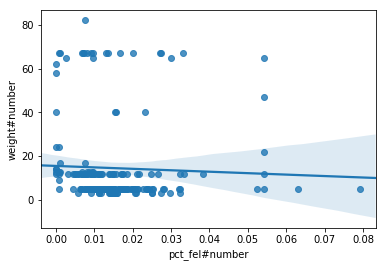

In [24]:
import seaborn as sns
# line of best fit for felonies per capita vs weight of most popular dog
sns.regplot(breeds_income_crime['pct_fel#number'],breeds_income_crime["weight#number"])

In [25]:
dogs_income = pd.merge(dogs, income, how = 'inner', left_on='ZipCode', right_on = 'GEO.id2')
dogs_income = dogs_income.drop(['GEO.id2'], axis = 1)
dogs_income = dogs_income.rename(columns = {"HC02_EST_VC02": 'median_income'})
dogs_income.head()


RowNumber AnimalName AnimalGender        AnimalBirthMonth  \
0      45321       RUBY            F  09/01/2011 12:00:00 AM   
1      45803      CUPID            M  08/01/2008 12:00:00 AM   
2      46001      KYLEE            F  06/01/2010 12:00:00 AM   
3      46523     CHANCE            M  10/01/2009 12:00:00 AM   
4      46881      LUKE             M  10/01/2015 12:00:00 AM   

                            BreedName Borough  ZipCode  CommunityDistrict  \
0  American Pit Bull Terrier/Pit Bull  Queens  11420.0              410.0   
1                              Beagle  Queens  11420.0              410.0   
2                          Pomeranian  Queens  11420.0              410.0   
3                      Boston Terrier  Queens  11420.0              410.0   
4                      Siberian Husky  Queens  11420.0              410.0   

   CensusTract2010   NTA  CityCouncilDistrict  CongressionalDistrict  \
0            176.0  QN55                 28.0                    5.0   
1            818.0  QN55                 28.0                    5.0   
2            838.0  QN55                 32.0                    5.0   
3          84601.0  QN55                 32.0                    5.0   
4            178.0  QN55                 28.0                    5.0   

   StateSenatorialDistrict LicenseIssuedDate LicenseExpiredDate median_income  
0                     10.0        01/01/2016         01/01/2017         61484  
1                     10.0        01/05/2016         02/13/2017         61484  
2                     10.0        01/06/2016         01/06/2018         61484  
3                     10.0        01/10/2016         02/05/2017         61484  
4                     10.0        01/12/2016         01/12/2017         61484

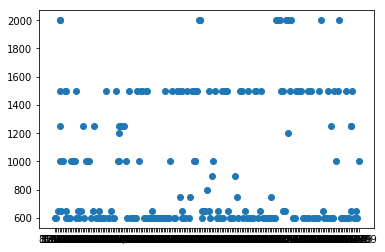

In [26]:
# plotting income vs price of most popular dog.
plt.scatter(breeds_income_crime['income#number'], breeds_income_crime["price#number"])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


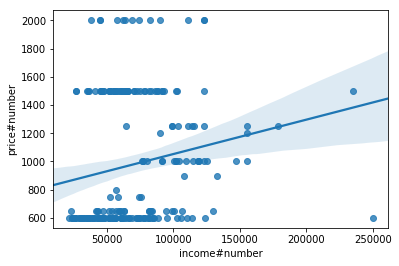

In [27]:
breeds_income_crime['income#number'] = breeds_income_crime['income#number'].replace('250,000+', '250000')
breeds_income_crime['income#number'] = breeds_income_crime['income#number'].replace('250,000', '250000')
breeds_income_crime['income#number'] = breeds_income_crime['income#number'].astype(float)
sns.regplot(breeds_income_crime['income#number'],breeds_income_crime["price#number"])

In [28]:
# logistic classification based on income features

model = LogisticRegression()
x = breeds_income_crime[['income#number']]
y = breeds_income_crime['BreedName']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
model.fit(x_train, y_train)
preds = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.5


/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
# logistic classification based on crime features
breeds_income_crime = breeds_income_crime.dropna(subset = ['pct_fel#number', 'pct_crime#number', 'FELONY#number', 'num_crimes#number', 'pop#number'])
model = LogisticRegression()
x = breeds_income_crime[['pct_fel#number', 'pct_crime#number', 'FELONY#number', 'num_crimes#number']]
y = breeds_income_crime['BreedName']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_test)
model.fit(x_train, y_train)
preds = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)


     pct_fel#number  pct_crime#number  FELONY#number  num_crimes#number
18         0.027364          0.056866          870.0             1808.0
174        0.010992          0.028233          394.0             1012.0
110        0.011076          0.029178          413.0             1088.0
101        0.007128          0.013266          108.0              201.0
181        0.008442          0.020503          168.0              408.0
186        0.014252          0.032432          704.0             1602.0
5          0.054181          0.174582          162.0              522.0
149        0.015759          0.041301          873.0             2288.0
12         0.013801          0.038942          830.0             2342.0
155        0.007089          0.016153          262.0              597.0
61         0.005029          0.012690          151.0              381.0
128        0.023306          0.054207         1338.0             3112.0
184        0.015204          0.039677          597.0            

/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
# logistic classification based on crime and income features

model = LogisticRegression()
x = breeds_income_crime[['pct_fel#number', 'pct_crime#number', 'FELONY#number', 'num_crimes#number', 'income#number']]
y = breeds_income_crime['BreedName']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
model.fit(x_train, y_train)
preds = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.5098039215686274


/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/datasets/home/88/788/hnavnitl/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
shpfile_graph = 'breeds_income_crime-12.csv'

whole = pd.read_csv(shpfile_graph)

In [33]:
whole

Unnamed: 0  Index#number#hidden  ZipCode           BreedName  \
0             0                    0  10001.0   Yorkshire Terrier   
1             1                    1  10002.0   Yorkshire Terrier   
2             2                    2  10003.0           Chihuahua   
3             3                    3  10004.0   Bull Dog, English   
4             4                    4  10004.0      French Bulldog   
5             5                    5  10004.0    Golden Retriever   
6             6                    6  10004.0             Maltese   
7             7                    7  10004.0            Shih Tzu   
8             8                    8  10005.0           Chihuahua   
9             9                    9  10006.0    Golden Retriever   
10           10                   10  10007.0            Shih Tzu   
11           11                   11  10009.0           Chihuahua   
12           12                   12  10009.0            Shih Tzu   
13           13                   13  10009.0   Yorkshire Terrier   
14           14                   14  10010.0   Yorkshire Terrier   
15           15                   15  10011.0   Yorkshire Terrier   
16           16                   16  10012.0  Labrador Retriever   
17           17                   17  10013.0  Labrador Retriever   
18           18                   18  10014.0  Labrador Retriever   
19           19                   19  10016.0            Shih Tzu   
20           20                   20  10016.0   Yorkshire Terrier   
21           21                   21  10017.0           Chihuahua   
22           22                   22  10018.0   Yorkshire Terrier   
23           23                   23  10019.0           Chihuahua   
24           24                   24  10021.0            Havanese   
25           25                   25  10022.0   Yorkshire Terrier   
26           26                   26  10023.0  Labrador Retriever   
27           27                   27  10024.0  Labrador Retriever   
28           28                   28  10025.0  Labrador Retriever   
29           29                   29  10026.0   Yorkshire Terrier   
..          ...                  ...      ...                 ...   
178         178                  178  11412.0   Yorkshire Terrier   
179         179                  179  11413.0   Yorkshire Terrier   
180         180                  180  11414.0            Shih Tzu   
181         181                  181  11415.0             Maltese   
182         182                  182  11416.0           Chihuahua   
183         183                  183  11417.0   Yorkshire Terrier   
184         184                  184  11418.0   Yorkshire Terrier   
185         185                  185  11419.0            Shih Tzu   
186         186                  186  11420.0   Yorkshire Terrier   
187         187                  187  11421.0            Havanese   
188         188                  188  11421.0   Yorkshire Terrier   
189         189                  189  11422.0   Yorkshire Terrier   
190         190                  190  11423.0            Shih Tzu   
191         191                  191  11426.0  Labrador Retriever   
192         192                  192  11427.0            Shih Tzu   
193         193                  193  11428.0             Maltese   
194         194                  194  11429.0   Yorkshire Terrier   
195         195                  195  11432.0   Yorkshire Terrier   
196         196                  196  11433.0   Yorkshire Terrier   
197         197                  197  11434.0            Shih Tzu   
198         198                  198  11435.0   Yorkshire Terrier   
199         199                  199  11436.0   Yorkshire Terrier   
200         200                  200  11580.0              Beagle   
201         201                  201  11580.0        Bichon Frise   
202         202                  202  11580.0            Havanese   
203         203                  203  11691.0            Shih Tzu   
204

In [46]:
income['GEO.id2'] = income['GEO.id2'].astype(float)
breeds_income = pd.merge(breeds, income, how = 'inner', left_on='ZipCode', right_on = 'GEO.id2')
breeds_income = breeds_income.drop(['GEO.id2'], axis = 1)
breeds_income = breeds_income.rename(columns = {"HC02_EST_VC02": 'median_income'})
#multi = [MultiPolygon([x]) for x in breeds_income['geometry']]
#breeds_income['geometry'] = multi
#rounded = [shapely.wkt.dumps(x, rounding_precision = 4) for x in breeds_income['geometry']]
#breeds_income['geometry'] = rounded

breeds_income.head()

ZipCode          BreedName  GEOID10  \
0  10001.0  Yorkshire Terrier  10001.0   
1  10002.0  Yorkshire Terrier  10002.0   
2  10003.0          Chihuahua  10003.0   
3  10004.0  Bull Dog, English  10004.0   
4  10004.0     French Bulldog  10004.0   

                                            geometry              Breed  \
0  POLYGON ((-74.00828145151267 40.75028026366047...  Yorkshire Terrier   
1  POLYGON ((-73.99750544586593 40.71407725694771...  Yorkshire Terrier   
2  POLYGON ((-73.99936744750801 40.73133126026276...          Chihuahua   
3  (POLYGON ((-73.99813844530892 40.7015332544669...  Bull Dog, English   
4  (POLYGON ((-73.99813844530892 40.7015332544669...     French Bulldog   

   weight           pic_file median_income  
0       5  yorkshire_terrier         85168  
1       5  yorkshire_terrier         35594  
2       3          chihuahua        100791  
3      47   bull_dog_english        123056  
4      22     french_bulldog        123056

In [47]:
zip_crimes['zip'] = zip_crimes['zip'].astype(float)
zip_pop['ZipCode'] = zip_pop['ZipCode'].astype(float)
zip_pop['pop'] = zip_pop['pop'].astype(float)

breeds_income_crime = pd.merge(breeds_income, zip_crimes, how = 'inner', left_on='ZipCode', right_on = 'zip')

breeds_income_crime = pd.merge(breeds_income_crime, dog_price, how = 'left', left_on='pic_file', right_on = 'pic_file')
breeds_income_crime = pd.merge(breeds_income_crime, zip_pop, how = 'left', left_on='ZipCode', right_on = 'ZipCode')
breeds_income_crime = pd.merge(breeds_income_crime, borough, how = 'left', left_on='ZipCode', right_on = 'ZipCode')

breeds_income_crime = breeds_income_crime.drop(['zip', 'GEOID10', 'Breed'], axis = 1)
breeds_income_crime['#name'] = breeds_income_crime['ZipCode']
breeds_income_crime = breeds_income_crime.reset_index()
breeds_income_crime.columns = ["Index#number#hidden", "ZipCode", "BreedName", "geometry", 'weight#number', "#img", "income#number", \
"FELONY#number", "MISDEMEANOR#number", "num_crimes#number", 'price#number', 'pop#number', "borough", "#name"]
breeds_income_crime['pct_crime#number'] = breeds_income_crime["num_crimes#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_fel#number'] = breeds_income_crime["FELONY#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_mis#number'] = breeds_income_crime["MISDEMEANOR#number"]/breeds_income_crime["pop#number"]
breeds_income_crime['pct_crime#number'] = breeds_income_crime['pct_crime#number'].fillna(0)
breeds_income_crime['income#number'] = breeds_income_crime['income#number'].replace('+', '')
breeds_income_crime = breeds_income_crime[["Index#number#hidden", "ZipCode", "BreedName", 'weight#number', "#img", "income#number", \
"FELONY#number", "MISDEMEANOR#number", "num_crimes#number", 'price#number', 'pop#number', "pct_crime#number", "pct_fel#number", "pct_mis#number", "#name", 'borough', 'geometry']]
breeds_income_crime.head()

Index#number#hidden  ZipCode          BreedName  weight#number  \
0                    0  10001.0  Yorkshire Terrier              5   
1                    1  10002.0  Yorkshire Terrier              5   
2                    2  10003.0          Chihuahua              3   
3                    3  10004.0  Bull Dog, English             47   
4                    4  10004.0     French Bulldog             22   

                #img income#number  FELONY#number  MISDEMEANOR#number  \
0  yorkshire_terrier         85168         1509.0              2182.0   
1  yorkshire_terrier         35594         1339.0              2859.0   
2          chihuahua        100791         1379.0              2290.0   
3   bull_dog_english        123056          162.0               360.0   
4     french_bulldog        123056          162.0               360.0   

   num_crimes#number  price#number  pop#number  pct_crime#number  \
0             3691.0           600     23947.0          0.154132   
1             4198.0           600     77925.0          0.053872   
2             3669.0           650     55035.0          0.066667   
3              522.0          1250      2990.0          0.174582   
4              522.0          2000      2990.0          0.174582   

   pct_fel#number  pct_mis#number    #name    borough  \
0        0.063014        0.091118  10001.0  Manhattan   
1        0.017183        0.036689  10002.0  Manhattan   
2        0.025057        0.041610  10003.0  Manhattan   
3        0.054181        0.120401  10004.0  Manhattan   
4        0.054181        0.120401  10004.0  Manhattan   

                                            geometry  
0  POLYGON ((-74.00828145151267 40.75028026366047...  
1  POLYGON ((-73.99750544586593 40.71407725694771...  
2  POLYGON ((-73.99936744750801 40.73133126026276...  
3  (POLYGON ((-73.99813844530892 40.7015332544669...  
4  (POLYGON ((-73.99813844530892 40.7015332544669...

In [51]:
breeds_income_crime.max()

Index#number#hidden                  207
ZipCode                            11697
BreedName              Yorkshire Terrier
weight#number                         82
#img                   yorkshire_terrier
income#number                      98922
FELONY#number                       2322
MISDEMEANOR#number                  3288
num_crimes#number                   5610
price#number                        2000
pop#number                        114647
pct_crime#number                0.200329
pct_fel#number                 0.0793291
pct_mis#number                     0.121
#name                              11697
borough                    Staten Island
dtype: object

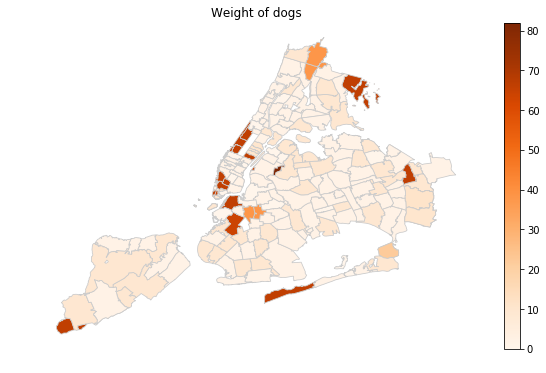

In [57]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

polygon = GeoDataFrame(breeds_income_crime, geometry = breeds_income_crime.geometry)  
map_df = polygon
map_df.head()
polygon['weight#number'] = polygon['weight#number'].fillna(0)


variable = 'weight#number'
vmin, vmax = 0, 82

fig, ax = plt.subplots(1, figsize = (10, 6))
a = map_df.plot(column = variable, cmap = 'Oranges', linewidth = 0.8, ax=ax, edgecolor = '0.8')
ax.axis('off')
ax.set_title('Weight of dogs')
color_bar = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
color_bar._A = []
col_bar = fig.colorbar(color_bar) 

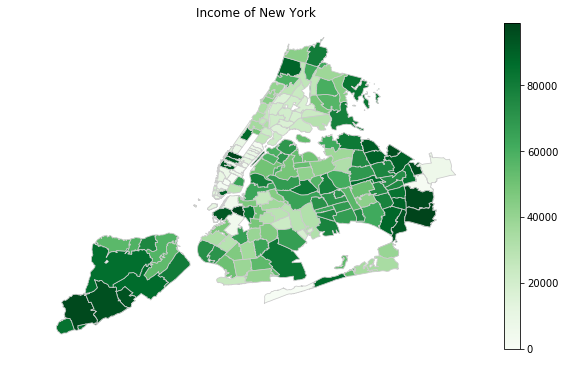

In [58]:
#from geopandas import GeoDataFrame
#import matplotlib.pyplot as plt
#import GeoDataFrame

polygon = GeoDataFrame(breeds_income_crime, geometry = breeds_income_crime.geometry)  #, crs=crs, geometry = polygon.geometry)
map_df = polygon
map_df.head()
polygon['income#number'] = polygon['income#number'].fillna(0)
#map_df.plot()

variable = 'income#number'
vmin, vmax = 0, 98922

fig, ax = plt.subplots(1, figsize = (10, 6))
a = map_df.plot(column = variable, cmap = 'Greens', linewidth = 0.8, ax=ax, edgecolor = '0.8')
#fig, ax = plt.subplot(1, figsize = (10,6))
ax.axis('off')
ax.set_title('Income of New York')
color_bar = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
color_bar._A = []
#health.plot(ax = a, marker='*', color='black', markersize = 2)
#health.plot(ax = a, marker='*', color='black', markersize = 10)
#b = health.plot(ax = a, marker = 'o', color='black', markersize = 10)
#print(health)
#health.plot(ax = a, marker = 'o', color = 'k', markersize = 10)
col_bar = fig.colorbar(color_bar) 
#promise.plot(ax = b, color = 'None', edgecolor = 'b')
#promise.plot(ax = b, linewidth = 0.15)
#promise.plot(ax = b, linewidth = 0.5)
#promise.plot(ax = b, color = 'None', edgecolor = 'black')
#promise.plot(ax = b, color = 'None', edgecolor = 'c')
#promise.plot(ax = b, color = 'None', edgecolor = 'black', linewidth = 0.15)
#promise.plot(ax = b, color = 'None', edgecolor = 'blue', linewidth = 0.10)

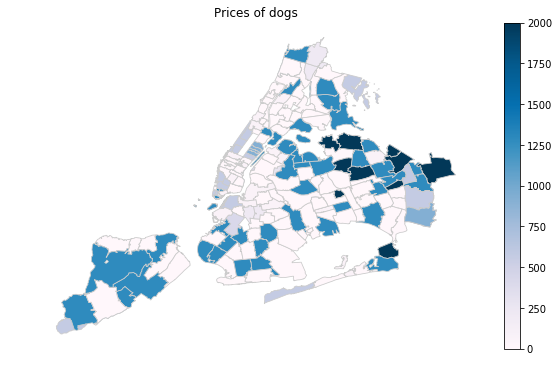

In [61]:
#from geopandas import GeoDataFrame
#import matplotlib.pyplot as plt
#import GeoDataFrame

polygon = GeoDataFrame(breeds_income_crime, geometry = breeds_income_crime.geometry)  #, crs=crs, geometry = polygon.geometry)
map_df = polygon
map_df.head()
polygon['price#number'] = polygon['price#number'].fillna(0)
#map_df.plot()

variable = 'price#number'
vmin, vmax = 0, 2000

fig, ax = plt.subplots(1, figsize = (10, 6))
a = map_df.plot(column = variable, cmap = 'PuBu', linewidth = 0.8, ax=ax, edgecolor = '0.8')
#fig, ax = plt.subplot(1, figsize = (10,6))
ax.axis('off')
ax.set_title('Prices of dogs')
color_bar = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
color_bar._A = []
#health.plot(ax = a, marker='*', color='black', markersize = 2)
#health.plot(ax = a, marker='*', color='black', markersize = 10)
#b = health.plot(ax = a, marker = 'o', color='black', markersize = 10)
#print(health)
#health.plot(ax = a, marker = 'o', color = 'k', markersize = 10)
col_bar = fig.colorbar(color_bar) 
#promise.plot(ax = b, color = 'None', edgecolor = 'b')
#promise.plot(ax = b, linewidth = 0.15)
#promise.plot(ax = b, linewidth = 0.5)
#promise.plot(ax = b, color = 'None', edgecolor = 'black')
#promise.plot(ax = b, color = 'None', edgecolor = 'c')
#promise.plot(ax = b, color = 'None', edgecolor = 'black', linewidth = 0.15)
#promise.plot(ax = b, color = 'None', edgecolor = 'blue', linewidth = 0.10)

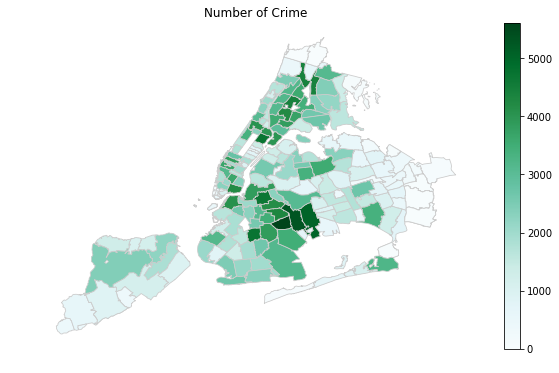

In [53]:
#from geopandas import GeoDataFrame
#import matplotlib.pyplot as plt
#import GeoDataFrame

polygon = GeoDataFrame(breeds_income_crime, geometry = breeds_income_crime.geometry)  #, crs=crs, geometry = polygon.geometry)
map_df = polygon
map_df.head()
polygon['num_crimes#number'] = polygon['num_crimes#number'].fillna(0)
#map_df.plot()

variable = 'num_crimes#number'
vmin, vmax = 0, 5610

fig, ax = plt.subplots(1, figsize = (10, 6))
a = map_df.plot(column = variable, cmap = 'BuGn', linewidth = 0.8, ax=ax, edgecolor = '0.8')
#fig, ax = plt.subplot(1, figsize = (10,6))
ax.axis('off')
ax.set_title('Number of Crime')
color_bar = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
color_bar._A = []
#health.plot(ax = a, marker='*', color='black', markersize = 2)
#health.plot(ax = a, marker='*', color='black', markersize = 10)
#b = health.plot(ax = a, marker = 'o', color='black', markersize = 10)
#print(health)
#health.plot(ax = a, marker = 'o', color = 'k', markersize = 10)
col_bar = fig.colorbar(color_bar) 
#promise.plot(ax = b, color = 'None', edgecolor = 'b')
#promise.plot(ax = b, linewidth = 0.15)
#promise.plot(ax = b, linewidth = 0.5)
#promise.plot(ax = b, color = 'None', edgecolor = 'black')
#promise.plot(ax = b, color = 'None', edgecolor = 'c')
#promise.plot(ax = b, color = 'None', edgecolor = 'black', linewidth = 0.15)
#promise.plot(ax = b, color = 'None', edgecolor = 'blue', linewidth = 0.10)

## Description

After analyzing the maps above, we tried to overlay the layers to see if there were connections between them. We can see that higher income levels doesn’t necessarily mean the prices of dogs in those areas were more expensive. Some of the rich areas even had less expensive dogs. We can also see that the crime and weights are only slightly correlated because where there is high crime, it doesn't necessarily mean that there are more larger dogs. 



## Summary

We found that contrary to our initial hypotheses the amount of crime in an area and the breed of dogs that is most popular there does not have a strong relation. As we’ve seen, some high crime areas have Yorkshire Terriers as the most popular dog. Although in some instances, we could see that crime and size of dog was correlated, for example zip code 10014 has both a high crime rate and the most popular dog being the Labrador Retriever. As for income’s effect, we found that people of all income levels most commonly buy Yorkshire Terriers. However, incomes between 50,000 and 100,000 would most likely to buy a dog that costs 1500-2000. Overall, Yorkshire Terriers are the most popular dog breed for New Yorkers. Other popular dogs include Shih Tzus, Chihuahuas, and Labrador Retrievers.



The below, This illustrates the relationship between dog weight and number of crimes. We can see that regardless of high or low rates of crimes, you can see various sizes of dogs. So crimes don’t really seem ti affect the weight of dogs that people get. 

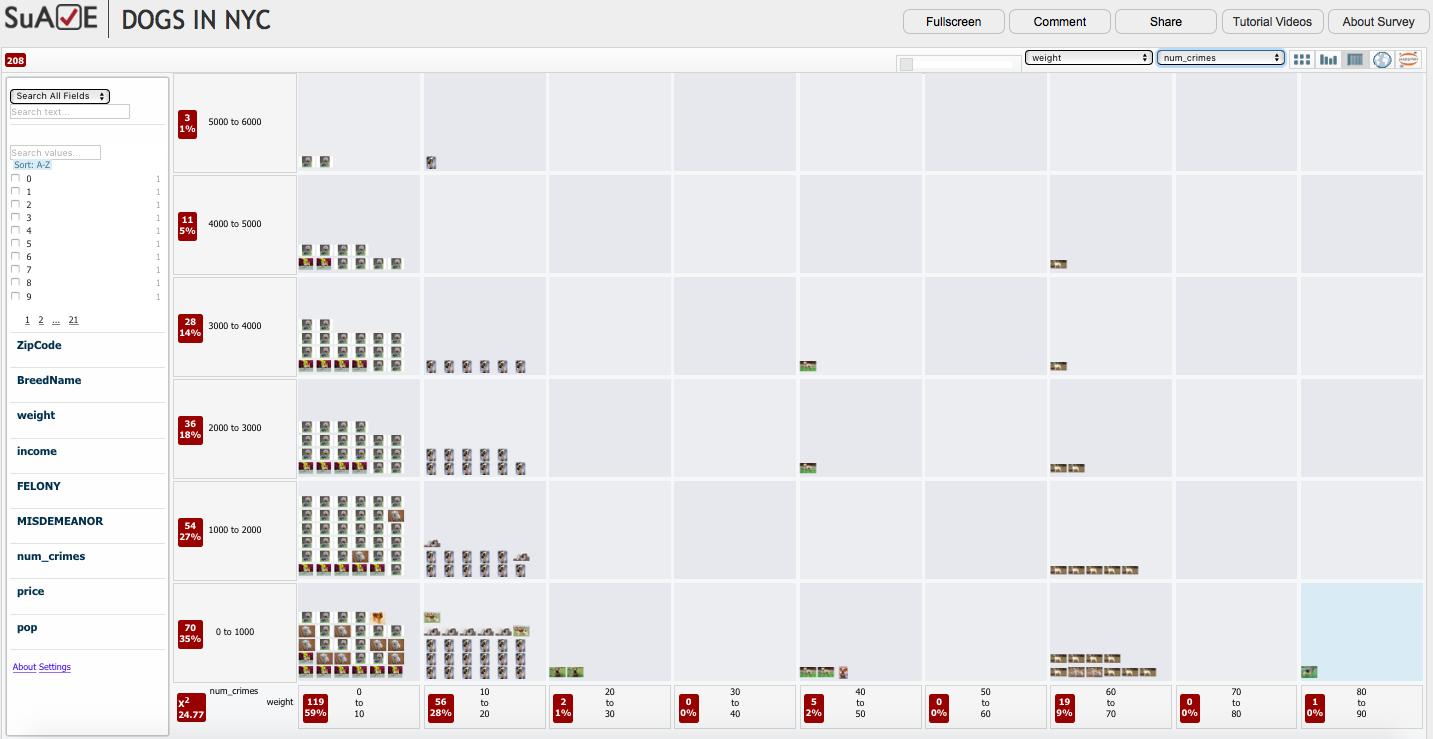

In [2]:
#from PIL import Image
Image(filename='Screen Shot 2019-06-08 at 11.55.46 PM.png')

This illustrates the relationship between income and number of crimes. You can see that even with high income the most popular dog bought is Yorkshire Terriers

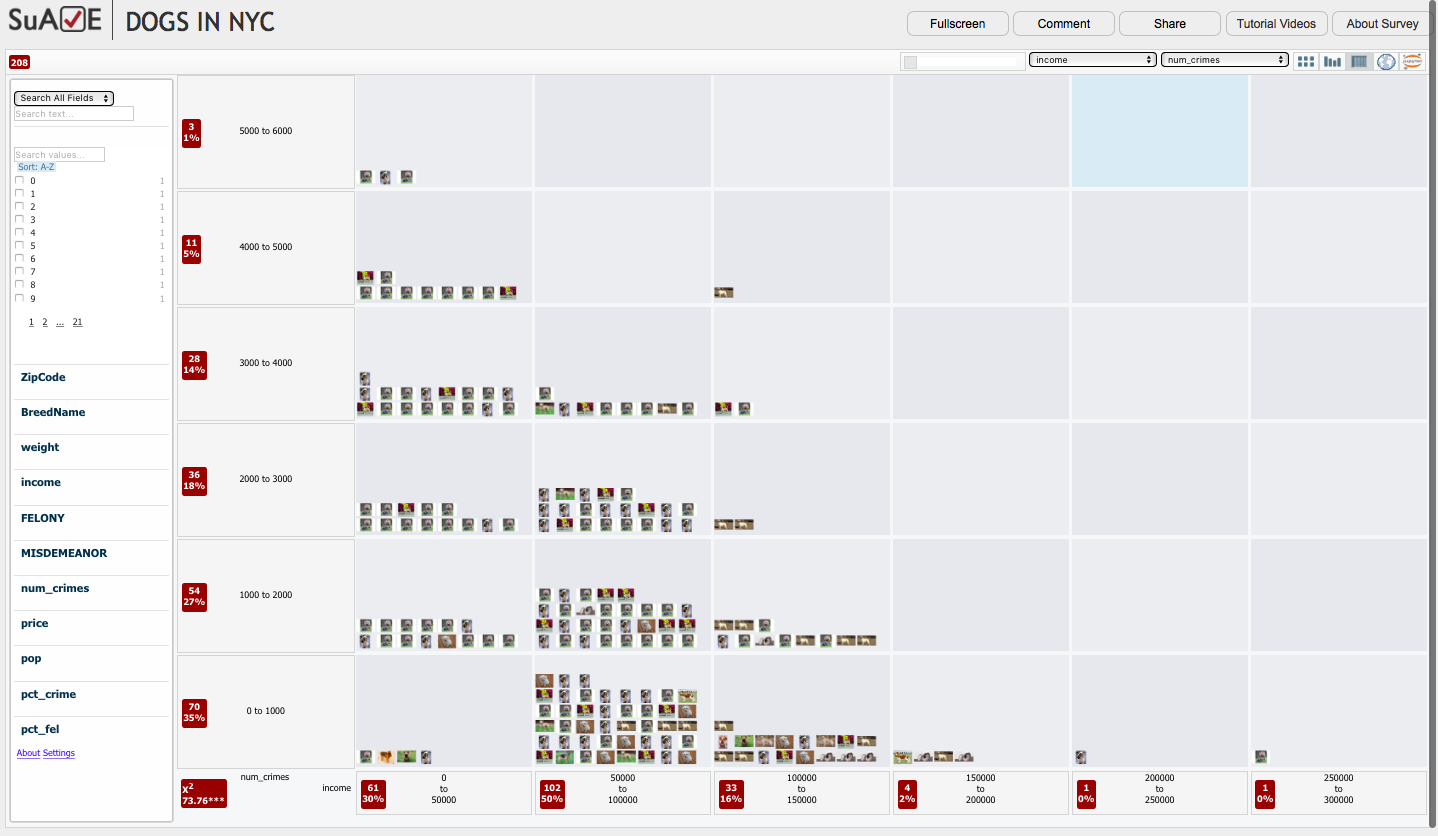

In [3]:
Image(filename='Screen Shot 2019-06-09 at 10.42.08 PM.png')

This illustrates a zoomed in version of a zip code depicting amount of crime. The yellow indicates medium-high crime areas. We can see that the most popular dog here is the Labrador Retriever, a larger dog which goes with what we thought we would find.

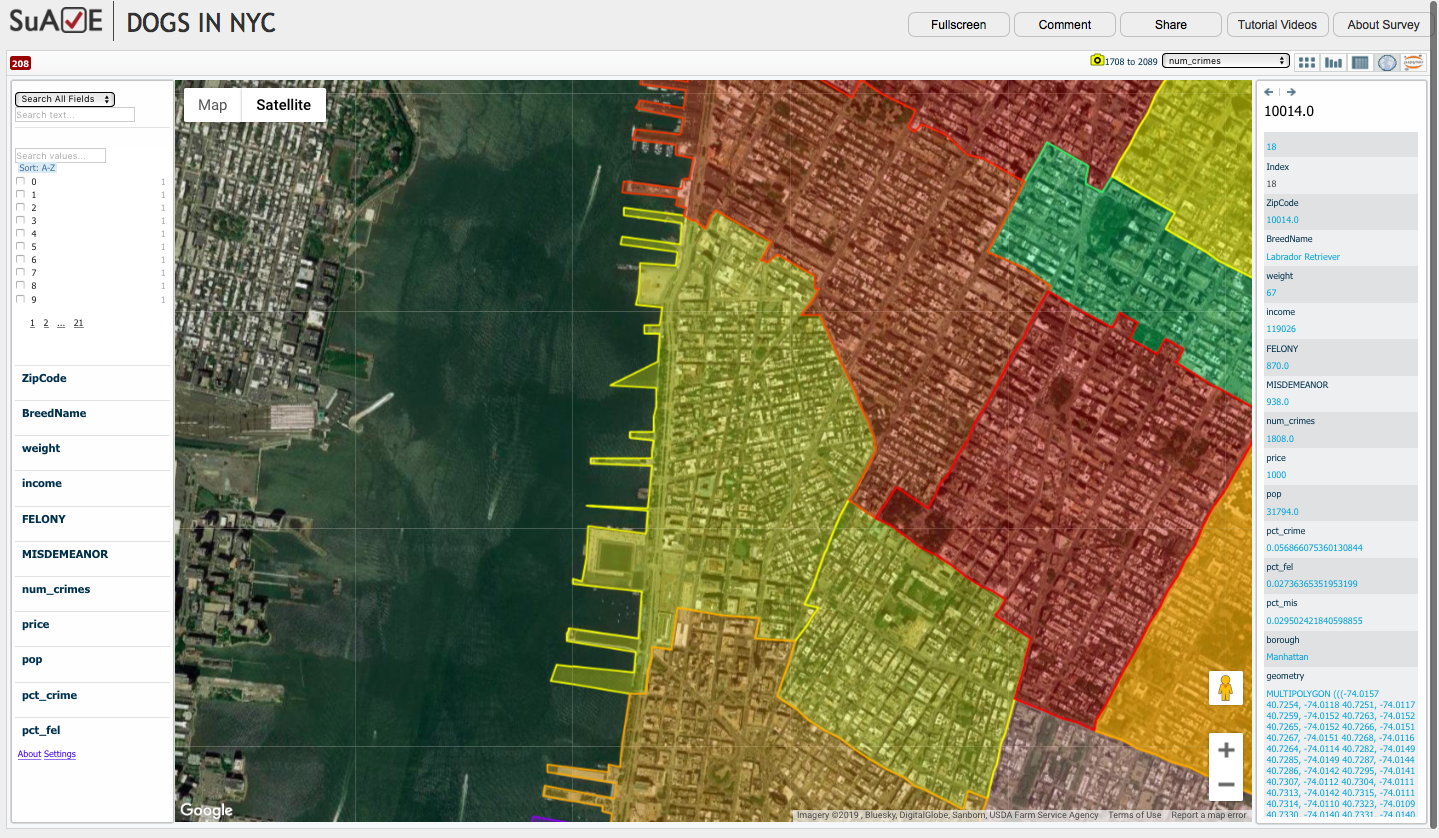

In [4]:
Image(filename='Screen Shot 2019-06-09 at 10.42.35 PM.png')

This illustrates zip codes with specifically Labrador Retrievers as the most popular breed with respect to crime. We see that Labrador Retriever is popular in areas where the crime rate is higher or medium. More areas are on the lower end of the scale which represents more crime.These zip codes also supports our original hypothesis that more crime leads to bigger dogs. 

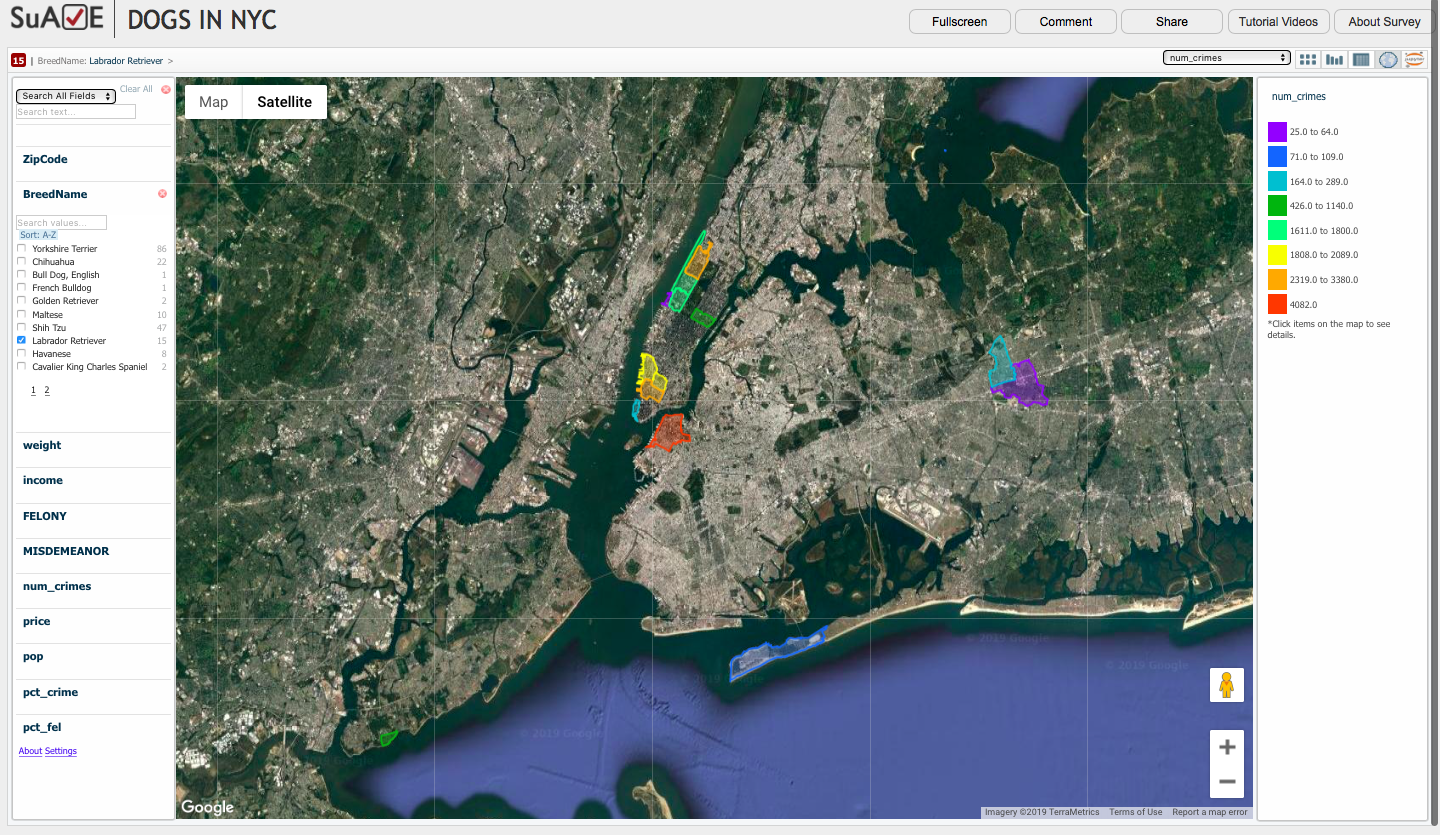

In [5]:
Image(filename='Screen Shot 2019-06-09 at 10.43.02 PM.png')

This illustrates the relationship between crime and New York City boroughs. We can see that in areas with more crime dog owners there are less likely to register their dogs. The first 2 boroughs are high in crime. We see that the population of registered dogs there is comparatively less than the other boroughs. 

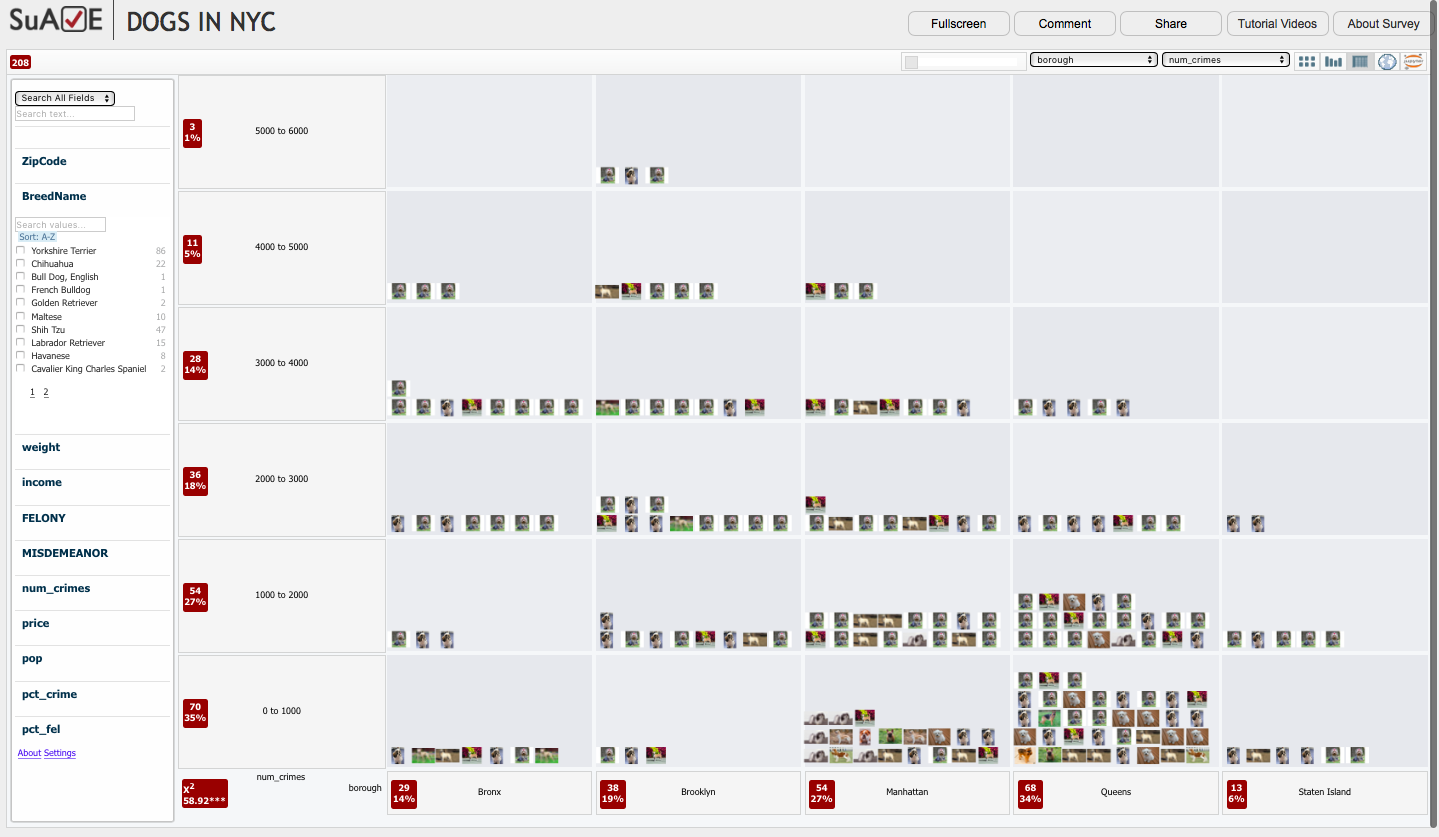

In [6]:
Image(filename='Screen Shot 2019-06-09 at 10.43.25 PM.png')

## Discussion
The literature expected us to see more dogs that are small in rich areas. We didn’t really find any relation between the income of the area and the most popular dog owned. In most areas the most popular dog was Yorkshire Terrier regardless of the income of the area. For the project we decided to focus on the most popular dog however if we analyzed every dog in the dataset there could potentially be a trend where the income is related with the dog. Although the most popular dog didn’t show that. 

One of the articles mentioned how certain burroughs has less dogs registered compared to other burroughs. We can also see that when we plot the dogs with respect to burroughs. We also read that there were certain prominent big dogs in areas. There were a few examples of high crime rates and larger dogs correlation. For example, the one zip code we saw above with Labrador Retriever and the popularity with respect to the areas. 

We saw some examples of what the article indicated. But overall, the ideas we found in previous literature weren’t strongly represented in our project. We think if we went with a more representative dog data set rather than just registered dogs the data might be more conclusive with previous findings. Although there are reasons as to why there might be a prevalence of small dogs like Yorkies in a crowded high population city such as New York City. The apartment style of New York might also restrict big dogs. There are many other factors that may play a role rather than just income and crime. 



## Conclusions and Future Work

Based on the data we had access to and used in this project, we were able to answer our initial proposed research questions and conclude that there doesn’t seem to be a relationship between income and dog price or crime and dog size. However, to find a more conclusive answer, we may need to find a way to access some additional data that is more representative of every dog in New York City, not just the ones registered and maybe find a way to figure out the breeds of “Unknown” dogs. We would also like to have access to a price of average dog dataset since ours was sourced from Google which had varying price figures as well as doesn’t take into account that the dogs in New York City were likely purchased from New York and would subsequently be priced differently. In the future, we would like to build a more accurate prediction model by adding more features. Some potential features we would look for would be average square footage of houses or apartments in a zip code or type of residents such as families or couples. Perhaps by comparing suburban areas of New York with theoretically bigger houses and more parks to downtown areas with high rise buildings and smaller spaces, we can find a correlation there with dog size or type of dog. 

Our approach could theoretically be extended to the popularity of anything in a zip code as long as a large enough data set exists for it. We could find the most popular cuisine of food in any zip code based upon a data set of number of customers in restaurants of each type of cuisine. This could be useful to someone who wants to open a restaurant who can use this information to either open it in an area without much competition for the cuisine of food they want to sell or conversely, in an area where they know there is already plenty of demand for their cuisine of choice. 

